In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [159]:
a = np.loadtxt('output-2019_10_03-00_47_40.txt.gz', delimiter=',')

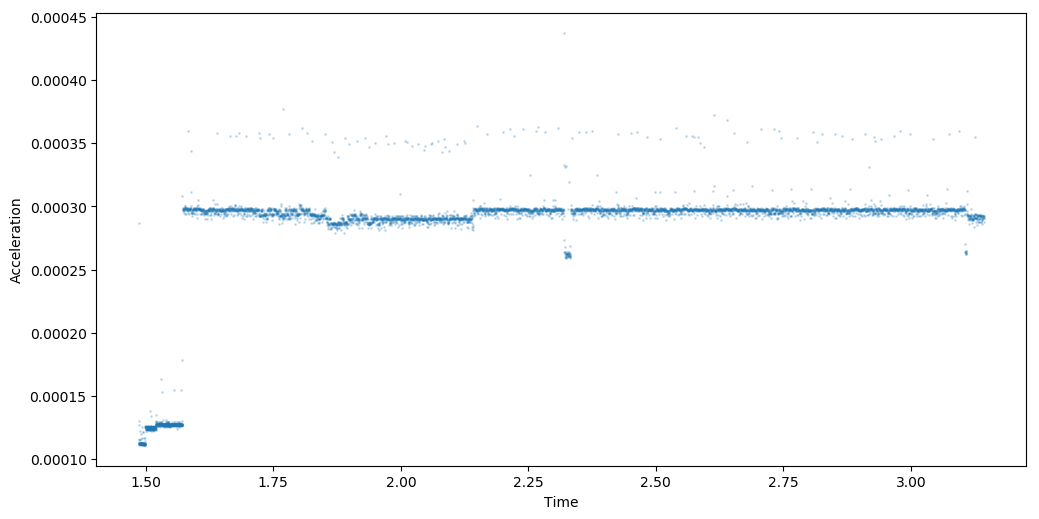

In [160]:
fig = plt.figure(figsize=(12,6), dpi=100)
begin = 0       #Starting time step
end = len(a)    #Number of steps from begin
# end = 800

timeseries = range(begin, end)
timeseries = a[:,0]-a[0,0]
# plt.plot(a[begin:end,0], a[begin:end,1]-cal[0], a[begin:end,0], a[begin:end,2]-cal[1], a[begin:end,0], a[begin:end,3]-cal[2])
# plt.plot(a[begin:end,0], np.max(np.abs(a[begin:end,1:4]-cal), axis=1), '--r')
# plt.plot(a[begin:end,0], np.sqrt(np.sum(np.square(a[begin:end,1:4]), axis=1))-np.sqrt(np.sum(np.square(cal))), '--k')

# plt.plot(timeseries, a[begin:end,1]-cal[0], timeseries, a[begin:end,2]-cal[1], timeseries, a[begin:end,3]-cal[2])
# # plt.plot(timeseries, np.max(np.abs(a[begin:end,1:4]-cal), axis=1), '--r')
# plt.plot(timeseries, np.sqrt(np.sum(np.square(a[begin:end,1:4]), axis=1))-np.sqrt(np.sum(np.square(cal))), '--k')

# plt.plot([timeseries[0], timeseries[-1]], [0,0], '--k')
# plt.plot(timeseries, a[begin:end,1], timeseries, a[begin:end,2], timeseries, a[begin:end,3])
# # plt.plot(timeseries, np.max(np.abs(a[begin:end,1:4]), axis=1), '--r')
# plt.plot(timeseries, np.sqrt(np.sum(np.square(a[begin:end,1:4]), axis=1))-1, 'k', linewidth=4, alpha=0.25)


plt.plot(a[0:-1,0], np.diff(a[:,0]), 'o', markersize=1, alpha=0.2)

plt.xlabel('Time')
plt.ylabel('Acceleration')
# plt.legend(['X', 'Y', 'Z', 'Normal'])
# plt.savefig('testfig.png', dpi=150)
plt.show()

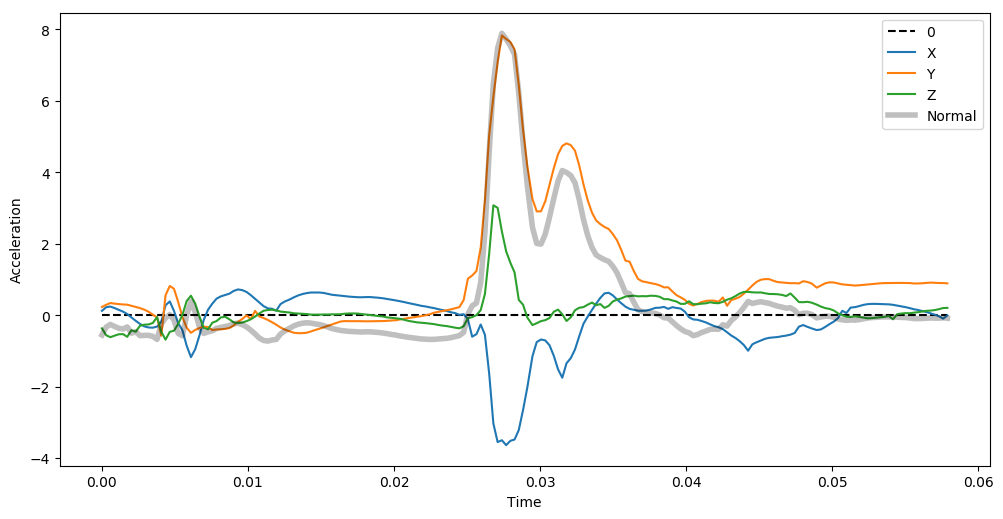

In [163]:
fig = plt.figure(figsize=(12,6), dpi=100)
begin = 1800       #Starting time step
# end = len(a)    #Number of steps from begin
end = 2000

timeseries = range(begin, end)
timeseries = a[begin:end,0]-a[begin,0]
# plt.plot(a[begin:end,0], a[begin:end,1]-cal[0], a[begin:end,0], a[begin:end,2]-cal[1], a[begin:end,0], a[begin:end,3]-cal[2])
# plt.plot(a[begin:end,0], np.max(np.abs(a[begin:end,1:4]-cal), axis=1), '--r')
# plt.plot(a[begin:end,0], np.sqrt(np.sum(np.square(a[begin:end,1:4]), axis=1))-np.sqrt(np.sum(np.square(cal))), '--k')

# plt.plot(timeseries, a[begin:end,1]-cal[0], timeseries, a[begin:end,2]-cal[1], timeseries, a[begin:end,3]-cal[2])
# # plt.plot(timeseries, np.max(np.abs(a[begin:end,1:4]-cal), axis=1), '--r')
# plt.plot(timeseries, np.sqrt(np.sum(np.square(a[begin:end,1:4]), axis=1))-np.sqrt(np.sum(np.square(cal))), '--k')

plt.plot([timeseries[0], timeseries[-1]], [0,0], '--k')
plt.plot(timeseries, a[begin:end,1], timeseries, a[begin:end,2], timeseries, a[begin:end,3])
# plt.plot(timeseries, np.max(np.abs(a[begin:end,1:4]), axis=1), '--r')
plt.plot(timeseries, np.sqrt(np.sum(np.square(a[begin:end,1:4]), axis=1))-1, 'k', linewidth=4, alpha=0.25)


# plt.plot(range(len(a)-1), np.diff(a[:,0]))

plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.legend(['0','X', 'Y', 'Z', 'Normal'])
# plt.savefig('testfig.png', dpi=150)
plt.show()

In [123]:
difference = np.diff(a[:,0])
(a[-1,0]-a[0,0])/len(a), np.mean(difference), max(difference), min(difference)

(0.00014200900900900943,
 0.00014243674698795222,
 0.0002789999999999182,
 0.00011999999999989797)

In [124]:
len(a)

333

In [ ]:
#!/usr/bin/env python

#Script to test speed of reading.

# import sys
# print(sys.path)
# ipypaths = ['/home/pi/.local/bin', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '', '/home/pi/.local/lib/python3.7/site-packages', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/home/pi/.local/lib/python3.7/site-packages/IPython/extensions', '/home/pi/.ipython']
# sys.path.append('/usr/local/lib/python3.7/dist-packages')
# sys.path.append('/usr/lib/python3/dist-packages')
# print(sys.path)

import time
from mpu6050 import mpu6050
import numpy as np
import os
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
# from matplotlib.figure import Figure


mpu = mpu6050(0x68)
mpu.set_accel_range(24)  #Acceptable  values: 0, 8, 16, 24

# def calibrate(caltime):
#     stop = time.time()+caltime
#     d = mpu.get_accel_data()
#     a = np.array([d['x'], d['y'], d['z']])
#     while time.time() < stop:
#         d = mpu.get_accel_data()
#         a = np.vstack([a, [d['x'], d['y'], d['z']]])
#     return np.mean(a, axis=0)

# cal = calibrate(1)


def print_figure(a, namestr):
#     ax = fig.subplots()
    begin = 0       #Starting time step
    end = len(a)    #Number of steps from begin
#     end = 2000
    timeseries = range(begin, end)

    fig, ax = plt.subplots(figsize=(12,6))
    line0, = ax.plot([timeseries[0], timeseries[-1]], [0,0], '--k', alpha=0.25)
    line1, = ax.plot(timeseries, a[begin:end,1])
    line2, = ax.plot(timeseries, a[begin:end,2])
    line3, = ax.plot(timeseries, a[begin:end,3])
    line4, = ax.plot(timeseries, np.sqrt(np.sum(np.square(a[begin:end,1:4]), axis=1))-1, '--k')


    ax.set_xlabel('Time')
    ax.set_ylabel('Acceleration')
    ax.legend(['X', 'Y', 'Z'], loc='upper right')
    fig.savefig(namestr+'.png', dpi=150)
    return None

    

#Make LED on or off
ledblinkon = 'echo heartbeat | sudo tee /sys/class/leds/led0/trigger >/dev/null'
ledsolidon = 'echo 1 | sudo tee /sys/class/leds/led0/brightness >/dev/null'
ledsolidoff = 'echo 0 | sudo tee /sys/class/leds/led0/brightness >/dev/null'

#Turn on and off LED control
lednorm = 'echo mmc0 | sudo tee /sys/class/leds/led0/trigger >/dev/null'
ledoff = 'echo none | sudo tee /sys/class/leds/led0/trigger >/dev/null'

def main():
    os.system(ledoff)
    os.system(ledsolidon)

    rec_duration = 2   # seconds

    datapoints = int(rec_duration/.0009)

    a = np.zeros((datapoints, 4))
    for i in range(datapoints):
        d = mpu.get_accel_data(g = True)
        a[i] = [time.clock(), d['x'], d['y'], d['z']]
    print('Runtime: {}'.format(a[-1,0]-a[0,0]))
    print('Time Slice Avg, Max, Min: {} {} {}'.format((a[-1,0]-a[0,0])/datapoints, max(a[:,0]), min(a[:,0]))

    os.system(ledsolidoff)
    os.system(lednorm)

    namestr = 'output-{}'.format(time.strftime('%Y_%m_%d-%H_%M_%S'))

    np.savetxt(namestr+'.txt.gz', a, delimiter=',', fmt='%1.5e')
    print('Data file saved: {}'.format(namestr))

    print_figure(a, namestr)

if __name__ == "__main__":
    main()